<a href="https://colab.research.google.com/github/wahyufajar879/PCVK_Genap_2023/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

3. Buat Global Threshold (BINARY, BINARY_INV, TRUNC, TOZERO, TOZERO_INV) secara
manual sesuai dengan deskripsi dari grafik yang ditunjukkan di atas.

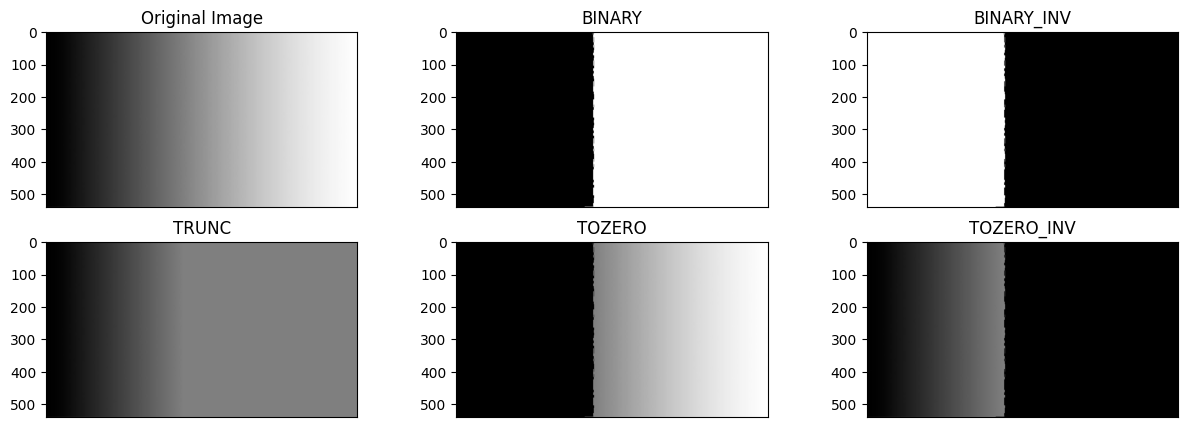

In [8]:
filename = ('/content/drive/MyDrive/PCVK/week10/img/gradient.jpg')
img= cv.imread(filename)
imgthresh1 = cv.imread(filename)
imgthresh2 = cv.imread(filename)
imgthresh3 = cv.imread(filename)
imgthresh4 = cv.imread(filename)
imgthresh5 = cv.imread(filename)
thresh = 127 #nilai Threshold yang ditentukan

def thres1(image, thresh, maxVal):
  imgThres = image
  imgThres[imgThres>thresh] = maxVal
  imgThres[imgThres!=maxVal] = 0
  return imgThres


def thres3(image, thresh, maxVal):
  imgThresTru = image
  imgThresTru[imgThresTru>thresh] = thresh
  return imgThresTru

def thres4(image, thresh, maxVal):
  imgThresZero = image
  imgThresZero[imgThresZero<=thresh] = 0
  return imgThresZero

def thres5(image, thresh, maxVal):
  imgThresZeroInv = image
  imgThresZeroInv[imgThresZeroInv>thresh] = 0
  return imgThresZeroInv

thresh1 = thres1(imgthresh1,thresh,255) #FIXED
#2. thresh2 adalah binary threshold inverse
thresh2 = 255-thresh1
thresh3 = thres3(imgthresh3,thresh,255) #FIXED
thresh4 = thres4(imgthresh4,thresh,255) # RFixed
thresh5 = thres5(imgthresh5,thresh,255) # FXED

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
plt.figure(figsize = (15,5))
# cv2_imshow(images[3])
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i])
  plt.title(titles[i])
  plt.xticks([]),

4. Buat Otsu Thresholding tanpa menggunakan Library. Tampilkan juga nilai threshold 
saat anda gunakan Otsu’s, seperti terlihat pada gambar hasil berikut. (gunakan image 
lena_gs_lc2.jpg agar benar2 terlihat beda antara hasil otsu’s dengan global threshold 
biasa)

<ipython-input-9-df6d97fc6194>:30: RuntimeWarning: invalid value encountered in true_divide
  mb = sumb / wb
<ipython-input-9-df6d97fc6194>:31: RuntimeWarning: invalid value encountered in true_divide
  mf = (sumb - sumb)/wf


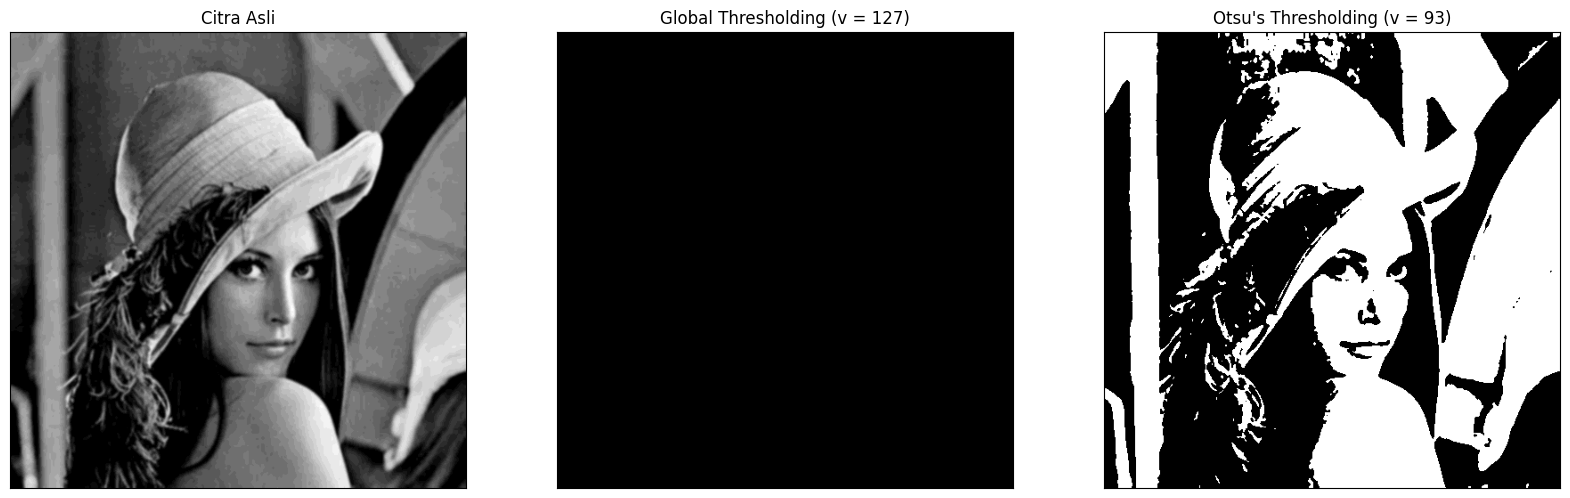

In [9]:
filename_2 = ('/content/drive/MyDrive/PCVK/week10/img/lena_gs_lc2.jpg')
img_lena = cv.imread(filename_2, 0)
blur = cv.GaussianBlur(img_lena,(5,5),0)
thresh = 127

img_lena = cv.imread(filename_2, 0)
blur = cv.GaussianBlur(img_lena, (5,5),0)

# Mencari nilai histogram dari channel gambar
# images, channel gambar [0 = blue], mask, maxSize, range 
histo = cv.calcHist([blur],[0],None,[256], [0,256])

histo_norm = histo.ravel()/histo.max() 

# Mengubah atau menjadikan hasil dari hist_norm ke array 
Q = histo_norm.cumsum() 

bins = np.arange (256) 
wb = 0 
sumb = 0 
varmax = 0 
thresh = -1

for i in range(0,255):
  wb += histo[i] # Menjumlahkan nilai dari semua pixel background
  # Menjumlahkan nilai dari semua pixel foreground 
  wf = (img_lena.shape[0] * img_lena.shape[1]) - wb 
  
  sumb += (i*histo[i])
  mb = sumb / wb
  mf = (sumb - sumb)/wf
  
  betweenvar = wb * wf * (mb - mf) * (mb - mf)
  if (betweenvar>varmax):
    varmax = betweenvar
    thresh = i

x = ("Otsu's Thresholding (v = ")+str(thresh)+")"
ret, th1 = cv.threshold(blur, 127, 255, cv.THRESH_BINARY)
ret, th2 = cv.threshold (blur, thresh, 255, cv.THRESH_BINARY)

titles = ['Citra Asli', 'Global Thresholding (v = 127)', x]
citra3 = [blur, th1, th2]
plt.figure(figsize = (20,15))

for i in range(len(citra3)):
    plt. subplot(1,3,i+1),plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

5. Buat histogram dari citra tersegmentasi, Histogram hanya pada foreground image 
saja. Gunakan image Lily atau Leaves yang sudah disediakan di folder images.
Petunjuk:

a. anda dapat gunakan cv.calcHist untuk menampilkan histogram. 

b. Buka link berikut https://opencvtutorial.readthedocs.io/en/latest/histogram/histogram.html 

c. Dari link tersebut perhatikan bahwa cv.calcHist memiliki salah satu parameter 
yaitu mask. Jika diset None, maka keseluruhan image akan dihitung 
histogramnya. Jika kita tentukan mask, maka hanya bagian image yang 
dimasking warna putih yang akan dihitung histogramnya (dari contoh 
dibawah dinamakan dengan Citra Segment).

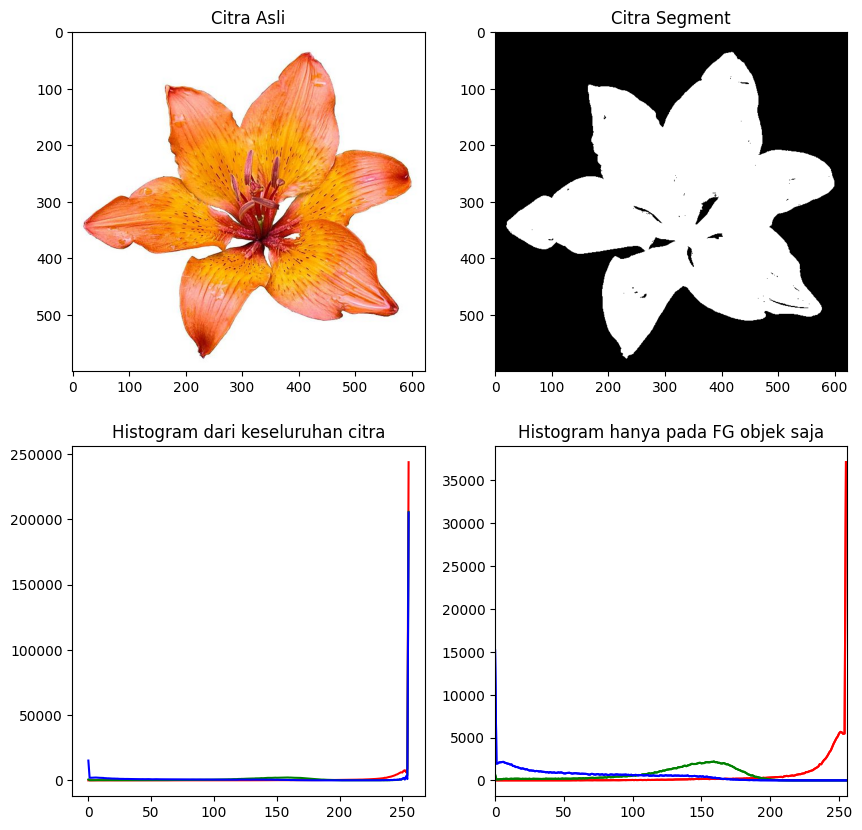

In [10]:
filename_3 = ('/content/drive/MyDrive/PCVK/week10/img/lily.jpg')
imgLily = cv.imread(filename_3)
img_rgb = cv.cvtColor(imgLily,cv.COLOR_BGR2RGB)
img_gray = cv.cvtColor(img_rgb,cv.COLOR_BGR2GRAY)

ret3,mask = cv.threshold(img_gray,200,255,cv.THRESH_BINARY_INV)
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

plt.show()

6. Lakukan segmentasi warna pada image "peppers.jpg", munculkan hanya warna yang 
kuning saja. (Petunjuk: anda dapat gunakan K-Means untuk menampilkan hanya 
warna tertentu saja)

(<Axes: >, <matplotlib.image.AxesImage at 0x7f8dda53e200>)

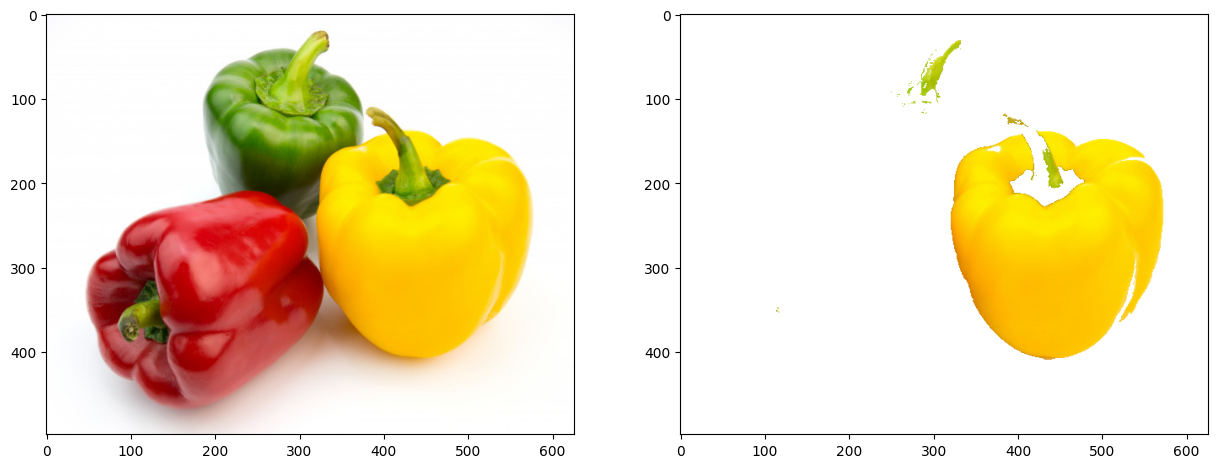

In [15]:
filename_4 = ('/content/drive/MyDrive/PCVK/week10/img/peppers.jpg')
img_peppers = cv.imread(filename_4) 
imgRGB = cv.cvtColor(img_peppers,cv.COLOR_BGR2RGB)

pixel_values = imgRGB.reshape((-1, 3)) 
pixel_values = np.float32(pixel_values)

# syarat berhenti iterasi dr KMeans adalah jika centroid sudah tidak terlalu 
# banyak pergeseran posisi antara interasi sekarang dengan iterasi sebelumnya (konvergen). 
# Karena jumlah data yang besar, maka kita akan hentikan iterasi saat jumlah iterasi = 100 atau epsilon(selisih antara posisi centroid skrg dgn posisi centroid di iterasi sebelumnya) <0.2

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Jika diperhatikan pada image asli, terdapat 3 warna utama (hijau, biru, dan putih/orange). Untuk percobaan ini kita akan gunakan 3 cluster untuk image ini

k = 6
_, labels, (centers) = cv.kmeans(pixel_values, k, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)

# konversi titik centroid ke dalam integer
centers = np.uint8(centers)

# flattening label array
labels = labels.flatten()

masked_image = np.copy(imgRGB)
masked_image0 = masked_image.reshape((-1, 3))
masked_image0[labels != 1] = [255, 255, 255]
masked_image0 = masked_image0.reshape(imgRGB.shape)

plt.figure(figsize = (15,12))
plt.subplot(2,2,1),plt.imshow(imgRGB)
plt.subplot(2,2,2),plt.imshow(masked_image0)

# Soal: Saat anda menampilkan warna tertentu, jelaskan kendala yang dihadapi dan mengapa hal itu terjadi.
# Jawab: Kendala yang dihadapi dalam melakukan segmentasi warna pada image “peppers.jpg” adalah
# warna yang didapat random (acak) karena didasarkan pada cluster terdekat. 
# Sehingga untuk menampilkan hanya warna kuning saja, perlu dilakukan running kode program secara berulang hingga mendapatkan warna objek yang diinginkan.

7. Buka File crossword.jpg. Dengan pengetahuan tentang thresholding yang sudah anda 
pelajari. Lakukan thresholding biner dengan hasil terbaik menurut anda. Copas code 
dan hasil image di modul ini.

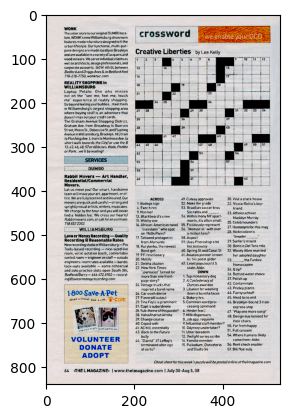

In [16]:
img_c = cv.imread('/content/drive/MyDrive/PCVK/week10/img/crossword.jpg')
img_rgb3 = cv.cvtColor(img_c, cv.COLOR_BGR2RGB)

ret, thresh = cv.threshold(img_rgb3, 125, 255, cv.THRESH_TOZERO)

plt.imshow(thresh)
cv.waitKey(0)
cv.destroyAllWindows()